In [16]:
#@title Librerias

import numpy as np # Númerica
import pandas as pd
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import quad, trapezoid, simpson, tplquad, fixed_quad # Integracón
from scipy.interpolate import CubicSpline, interp1d, lagrange # Interpolación
from scipy.optimize import fsolve, root_scalar, newton # Raíces
from scipy.stats import linregress # Regresión
import sympy as sp # Simbólica

# Parcial I - Métodos Computacionales
**2024-2**

---

*Nombre:* Estefania Zapata Valderrama

*Identificación:* 1006373242

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub del curso y recuerde hacer pull-request

# 1

**(40 puntos)** La velocidad del agua $v$ [m/s] en la descarga de un tanque cilindrico a través de un tubo largo (como se muestra en la figura) se puede calcular como:

$$
v = \sqrt{2gH}\tanh{\left(\frac{\sqrt{2gH}}{2L}t\right)}
$$



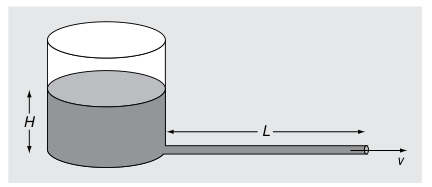

donde $g$ = 9.81 m/s$^2$, H es la carga hidrostática inicial (m), L la longitud del tubo (m) y $t$ el tiempo transcurrido (s).

*a)* Escriba una función explicita para encontrar la velocidad de descarga en función de las variables asociadas.

*b)* Realice un gráfico de $v(H)$ para $0\leq H\leq 5$, con $L = 4$ m y para $t = 2.5$ s

*c)* Suponga que quiere conocer la carga hidrostática necesaria para tener una velocidad de 5 m/s transcurridos 2.5 s. Identifique gráficamente este valor.

*d)* Realice una función que encuentre la raiz usando el método de bisección con una tolerancia de 1e-7, para esto puede modificar el siguiente pseudo-código:


```python
MÉTODO BISECCIÓN(f, a, b, tol)
    MIENTRAS (b - a)/2 > tol HACER
        c = (a + b)/2
        
        SI f(c) = 0 ENTONCES
            RETORNAR c
        
        SI f(a)*f(c) < 0 ENTONCES
            b = c
        SINO
            a = c
        FIN SI
    FIN MIENTRAS
    
    RETORNAR (a + b)/2
FIN MÉTODO
```

*e)* Usando el método de `scipy.newton` encuentre el valor de la raiz

```python
# Método de Newton
root = newton(f, x0, fprime)  # fprime es la derivada
```

Compare sus respuestas con el numeral anterior y obtenga el error relativo.


---
Solucion punto 1)

In [72]:
#INCISO A)
#Definir la funcion para la velocidad del agua
def v(h):
  return (np.sqrt(2*g*h)*(np.tanh((np.sqrt(2*g*h)/(2*l))*t)))


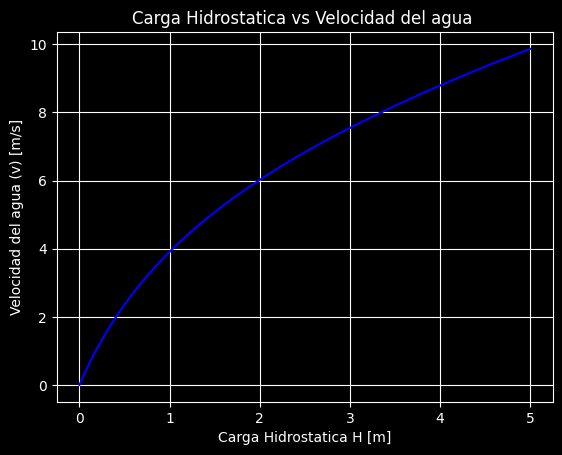

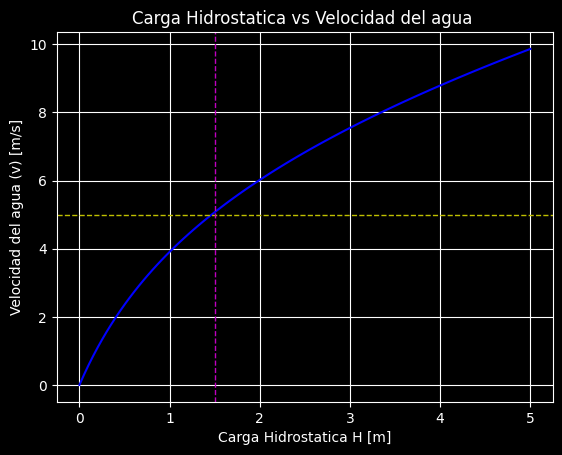

In [62]:
#INCISO B)
g= 9.81 #(m/s**2)
l= 4 #(m)
t= 2.5 #(s)

h = np.linspace(0,5,100)
v_vals = v(h)

plt.style.use("dark_background")
plt.figure()
plt.plot(h,v_vals,color='blue')
plt.xlabel('Carga Hidrostatica H [m]')
plt.ylabel('Velocidad del agua (v) [m/s]')
plt.title('Carga Hidrostatica vs Velocidad del agua ')
plt.grid()
plt.show()

#INCISO C)
#ahora agregare una linea para y = 1,5
plt.figure()
plt.plot(h,v_vals,color='blue')
plt.axhline(5, color='y', linestyle='--', linewidth=1)
plt.axvline(x=1.5, color='m', linestyle='--', linewidth=1)
plt.xlabel('Carga Hidrostatica H [m]')
plt.ylabel('Velocidad del agua (v) [m/s]')
plt.title('Carga Hidrostatica vs Velocidad del agua ')
plt.grid()
plt.show()

INCISO C)
Analizando la funcion graficamente, para tener una velocidad de 5 m/s transcurridos 2.5s. lo que hice fue trazar una linea horizontal para el valor de v=5m/s y esta linea toca la grafica en un valor de aproximadamente 1.5 m, valor para el cual podria aproximadamente alcanzar esa velocidad.


In [66]:
#INCISO D)
def biseccion(f, a, b, tol):
    while (b - a)/2 > tol:
        c = (a + b)/2

        if f(c) == 0:
            return c

        elif f(a)*f(c) < 0:
            b = c
        else:
            a = c

    return(a + b)/2

In [73]:
biseccion(v(h), 0 , 5 , (1*np.e**(-7))) #utilizo el codigo anterior y evaluo en 2 puntos dentro del rango (o,5)
#root = biseccion(v, 1, 5, 1e-7)
#biseccion( v(h), 0, 5, 1*np.e**(-7))
#
print("Raíz encontrada:", root)

TypeError: 'numpy.ndarray' object is not callable

In [76]:
#INCISO E)
from scipy.misc import derivative

# Derivada numérica usando scipy.misc.derivative
def dv(h):
    return derivative(v, h, dx=1e-5)

# Aplicamos el método de Newton
h0 = 0
raiz = newton(v, h0 , fprime=dv)

print(f"Raíz encontrada: h = {raiz}")


Raíz encontrada: h = 0.0


In [77]:
error_relativo = np.abs(biseccion - raiz) / np.abs(raiz)
print("Raíz con bisección:", biseccion)
print("Raíz con Newton:", newton)
print("Error relativo:", error_relativo)

TypeError: unsupported operand type(s) for -: 'function' and 'float'

# 2

**(30 puntos)** Usualmente algunas reacciones quimicas siguen el siguiente modelo:

$$
\frac{dc}{dt} = -kc^n
$$

donde $c$ es la concentración, $t$ el tiempo, $k$ la tasa de la reacción y $n$ su orden. Usando los siguientes datos:



```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
```


*a)* Conociendo que el método de diferencias finitas se puede escribir como:

###  Diferencias finitas hacia adelante:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### Diferencias finitas hacia atrás:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}
$$

### Diferencias finitas centradas:
Aproximación de segundo orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$

Escribe una función explicita que calcule $dc/dt$ usando el método de diferencias finitas a partir de los valores de $c$ y $t$, luego grafique en función de t. *Ayuda: No es necesario interpolar*

*b)* Compare el resultado anterior con `numpy.gradient`, se acercan?

*c)* Linealice la ecuación inicial (para esto puede usar log) y encuentre los valores correspondientes a $k$ y $n$



```python
# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)
```

*d)* Finalmente, usando los valores de $k$ y $n$ grafique $dc/dt$ y compare con los datos de la tabla. ¿Se comportan igual, determine el error máximo?




---
Solucion punto 2)

[-0.104   -0.04425 -0.03125 -0.022   -0.0155  -0.026  ]


<ipython-input-79-0ccdfd8893d7>:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


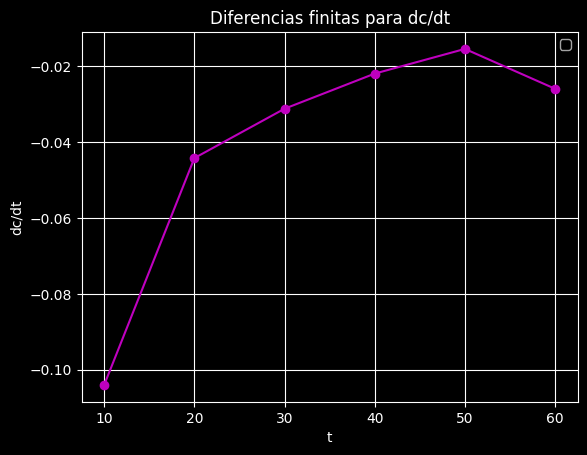

In [79]:

import numpy as np
import matplotlib.pyplot as plt

t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])

def calcular_derivada(c, t):
    n = len(t)
    dc_dt = np.zeros(n)

    # Diferencia finita hacia adelante para el primer punto
    h = t[1] - t[0]
    dc_dt[0] = (c[1] - c[0]) / h

    # Diferencia finita centrada para los puntos intermedios
    for i in range(1, n-1):
        h = t[i+1] - t[i-1]
        dc_dt[i] = (c[i+1] - c[i-1]) / (2 * h)

    # Diferencia finita hacia atrás para el último punto
    h = t[-1] - t[-2]
    dc_dt[-1] = (c[-1] - c[-2]) / h

    return dc_dt

# Calcular las derivadas
dc_dt = calcular_derivada(c,t)
print(dc_dt)

plt.style.use("dark_background")
plt.plot(t,dc_dt, 'o-', color='m')
plt.xlabel('t')
plt.ylabel('dc/dt')
plt.title('Diferencias finitas para dc/dt')
plt.grid(True)
plt.legend()
plt.show()




Valores de t: [10 20 30 40 50 60]
Derivada dc/dt (numpy.gradient): [-0.104   -0.04425 -0.03125 -0.022   -0.0155  -0.026  ]


<ipython-input-81-2f1fd4cfbb20>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


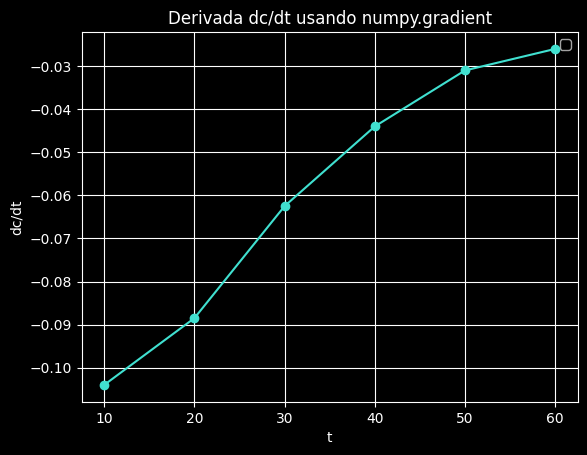

In [81]:
dc_dt_g = np.gradient(c, t)
print("Valores de t:", t)
print("Derivada dc/dt (numpy.gradient):", dc_dt)

plt.style.use("dark_background")
plt.plot(t, dc_dt_g, 'o-', color='turquoise')
plt.xlabel('t')
plt.ylabel('dc/dt')
plt.title('Derivada dc/dt usando numpy.gradient')
plt.grid(True)
plt.legend()
plt.show()




In [17]:
df = pd.DataFrame({'dc_dt': dc_dt,'dc_dt_g': dc_dt_g})

[-0.104   -0.04425 -0.03125 -0.022   -0.0155  -0.026  ]
[-0.104  -0.0885 -0.0625 -0.044  -0.031  -0.026 ]


Los valores de derivada calcculados con el metodo de biseccion se acercan mucho, en los extremos son identicos, la unica diferencia se da en en los datos centrales, por el metodo de biseccion se obtienen la mitad de el valor dado por el metodo de numpy.gradient.
para la parte de diferencias centradas en biseccion, al excluir el "2" del denominador, la grafica se ajusta perfectamente, dejo la grafica para terminos de visualizacion, pero continuo trabajando con la ecuacion original.

[-0.104  -0.0885 -0.0625 -0.044  -0.031  -0.026 ]


<ipython-input-84-b47165c3c52f>:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


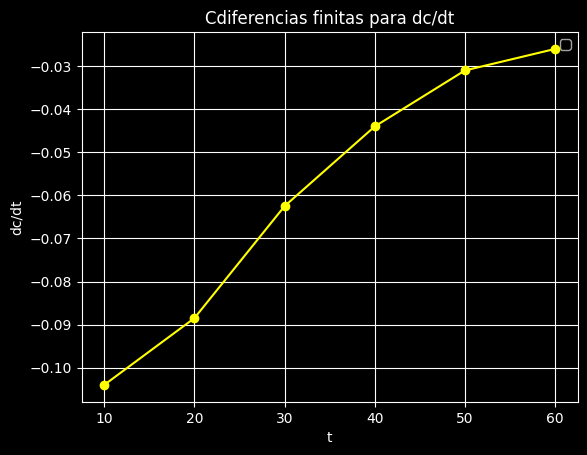

In [84]:

def calcular_derivada(c, t):
    n = len(t)
    dc_dt_s = np.zeros(n)

    # Diferencia finita hacia adelante para el primer punto
    h = t[1] - t[0]
    dc_dt_s[0] = (c[1] - c[0]) / h

    # Diferencia finita centrada para los puntos intermedios
    for i in range(1, n-1):
        h = t[i+1] - t[i-1]
        dc_dt_s[i] = (c[i+1] - c[i-1]) /  h #para esta grafica quité el 2 en esta expresion.

    # Diferencia finita hacia atrás para el último punto
    h = t[-1] - t[-2]
    dc_dt_s[-1] = (c[-1] - c[-2]) / h

    return dc_dt_s

dc_dt_s = calcular_derivada(c,t)
print(dc_dt_s)

plt.plot(t,dc_dt_s, 'o-', color='yellow')
plt.xlabel('t')
plt.ylabel('dc/dt')
plt.title('Cdiferencias finitas para dc/dt')
plt.grid(True)
plt.legend()
plt.show()




# 3
**(30 puntos)** Considere los  datos de concentración del punto anterior

```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
```

*a)* Realice un gráfico de $c(t)$

*b)* Usando la interpolación de `scipy.interpolate.lagrange` y de `scipy.interpolate.CubicHermiteSpline` obtenga el polinomio interpolador de lagrange llamado `poly_lagrange` y de Hermite `poly_Hermite` para los datos datos.

*c)* Conociendo que `scipy.interpolate.lagrange` devuelve un array tipo Polynomial, use la siguiente rutina para encontrar la derivada:

``` python
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
```

Luego, grafique $dc/dt$ en función del tiempo $t$ y compare con la función
$$
\frac{dc}{dt} = -kc^n
$$

con $k = 3$ y $n = -2$

*d)* Realice un gráfico del error absoluto




In [85]:
import numpy as np
import scipy.interpolate as interp

# Datos
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])

poly_lagrange = interp.lagrange(t, c)

dc = dc_dt
poly_Hermite = interp.CubicHermiteSpline(t, c, dc)

print("Polinomio de Lagrange:")
print(poly_lagrange)
print("\nPolinomio de Hermite:")
print(poly_Hermite)


Polinomio de Lagrange:
         5             4             3            2
2.5e-09 x - 4.583e-07 x + 3.792e-05 x - 0.002204 x + 0.1407 x + 4.07

Polinomio de Hermite:


In [89]:
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada

<ipython-input-91-af6349fa5744>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


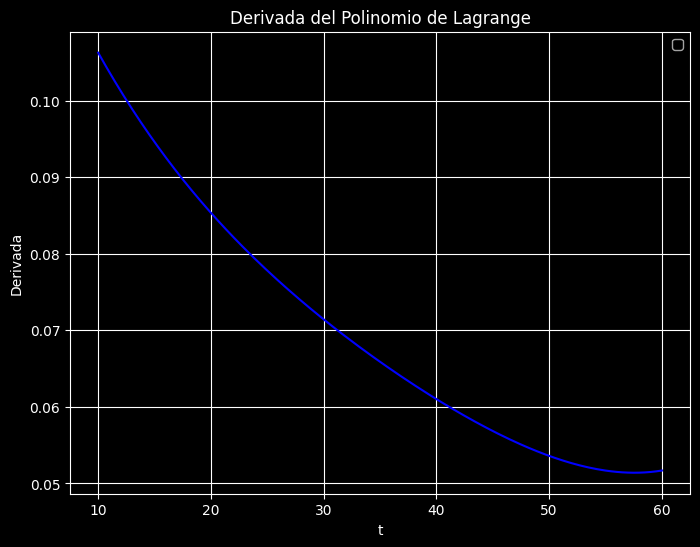

In [91]:
t_fine = np.linspace(min(t), max(t), 200)
derivative_values = derivative(t_fine)


plt.style.use("dark_background")
plt.figure(figsize=(8, 6))
plt.plot(t_fine, derivative_values, linestyle="-", color="blue")
plt.xlabel("t")
plt.ylabel("Derivada")
plt.title("Derivada del Polinomio de Lagrange")
plt.legend()
plt.grid()
plt.show()

